In [1]:
from azureml.core import Workspace, Dataset, Experiment
from sklearn.preprocessing import LabelEncoder

#Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# Load the workspace from the saved config file
ws = Workspace.from_config()

# Access the registered dataset
processed_data = Dataset.get_by_name(workspace=ws, name='iris_data_set')

# Load the dataset into a pandas DataFrame
df = processed_data.to_pandas_dataframe()

{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe'}
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe', 'activityApp': 'TabularDataset'}


In [3]:
# Step 2: Create or get an existing experiment 
experiment = Experiment(workspace=ws, name='model-training')

# Start a new run 
run = experiment.start_logging()

In [4]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

In [5]:
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
import pandas as pd

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')


# Convert confusion matrix to a DataFrame for better readability 
conf_matrix_df = pd.DataFrame(cm) 
# Convert DataFrame to a dictionary 
conf_matrix_dict = conf_matrix_df.to_dict()

run.log('Confusion matrix for Random Forest', conf_matrix_dict)

formatted_accuracy = format(accuracy, '.3f')
run.log('accuracy_random_forest', formatted_accuracy)

formatted_precision = format(precision, '.3f')
run.log('precision_random_Forest', formatted_precision)

formatted_recall = format(recall, '.3f')
run.log('recall_random_Forest', formatted_recall)

formatted_f1 = format(f1, '.3f')
run.log('f1-score_random_Forest', formatted_f1)

print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for Random Forest
 [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 5 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
accuracy_random_Forest : 0.267
precision_random_Forest : 0.267
recall_random_Forest : 0.267
f1-score_random_Forest : 0.267


In [8]:
logreg = LogisticRegression(solver= 'saga',max_iter=2000)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

# Convert confusion matrix to a DataFrame for better readability 
conf_matrix_df = pd.DataFrame(cm) 
# Convert DataFrame to a dictionary 
conf_matrix_dict = conf_matrix_df.to_dict()

run.log('Confusion matrix for Random Forest', conf_matrix_dict)

formatted_accuracy = format(accuracy, '.3f')
run.log('accuracy_random_forest', formatted_accuracy)

formatted_precision = format(precision, '.3f')
run.log('precision_random_Forest', formatted_precision)

formatted_recall = format(recall, '.3f')
run.log('recall_random_Forest', formatted_recall)

formatted_f1 = format(f1, '.3f')
run.log('f1-score_random_Forest', formatted_f1)

print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
accuracy_Logistic Regression : 0.244
precision_Logistic Regression : 0.244
recall_Logistic Regression: 0.244
f1-score_Logistic Regression : 0.244


/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [9]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

# Convert confusion matrix to a DataFrame for better readability 
conf_matrix_df = pd.DataFrame(cm) 
# Convert DataFrame to a dictionary 
conf_matrix_dict = conf_matrix_df.to_dict()

run.log('Confusion matrix for Random Forest', conf_matrix_dict)

formatted_accuracy = format(accuracy, '.3f')
run.log('accuracy_random_forest', formatted_accuracy)

formatted_precision = format(precision, '.3f')
run.log('precision_random_Forest', formatted_precision)

formatted_recall = format(recall, '.3f')
run.log('recall_random_Forest', formatted_recall)

formatted_f1 = format(f1, '.3f')
run.log('f1-score_random_Forest', formatted_f1)

print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]]
accuracy_KNN : 0.178
precision_KNN : 0.178
recall_KNN: 0.178
f1-score_KNN : 0.178


In [10]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

# Convert confusion matrix to a DataFrame for better readability 
conf_matrix_df = pd.DataFrame(cm) 
# Convert DataFrame to a dictionary 
conf_matrix_dict = conf_matrix_df.to_dict()

run.log('Confusion matrix for Random Forest', conf_matrix_dict)

formatted_accuracy = format(accuracy, '.3f')
run.log('accuracy_random_forest', formatted_accuracy)

formatted_precision = format(precision, '.3f')
run.log('precision_random_Forest', formatted_precision)

formatted_recall = format(recall, '.3f')
run.log('recall_random_Forest', formatted_recall)

formatted_f1 = format(f1, '.3f')
run.log('f1-score_random_Forest', formatted_f1)

print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 4 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 2 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 2 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
accuracy_Naive Bayes: 0.289
precision_Naive Bayes: 0.289
recall_Naive Bayes: 0.289
f1-score_Naive Bayes : 0.289


In [11]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

# Convert confusion matrix to a DataFrame for better readability 
conf_matrix_df = pd.DataFrame(cm) 
# Convert DataFrame to a dictionary 
conf_matrix_dict = conf_matrix_df.to_dict()

run.log('Confusion matrix for Random Forest', conf_matrix_dict)

formatted_accuracy = format(accuracy, '.3f')
run.log('accuracy_random_forest', formatted_accuracy)

formatted_precision = format(precision, '.3f')
run.log('precision_random_Forest', formatted_precision)

formatted_recall = format(recall, '.3f')
run.log('recall_random_Forest', formatted_recall)

formatted_f1 = format(f1, '.3f')
run.log('f1-score_random_Forest', formatted_f1)

print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 2 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 3 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]
accuracy_DecisionTr

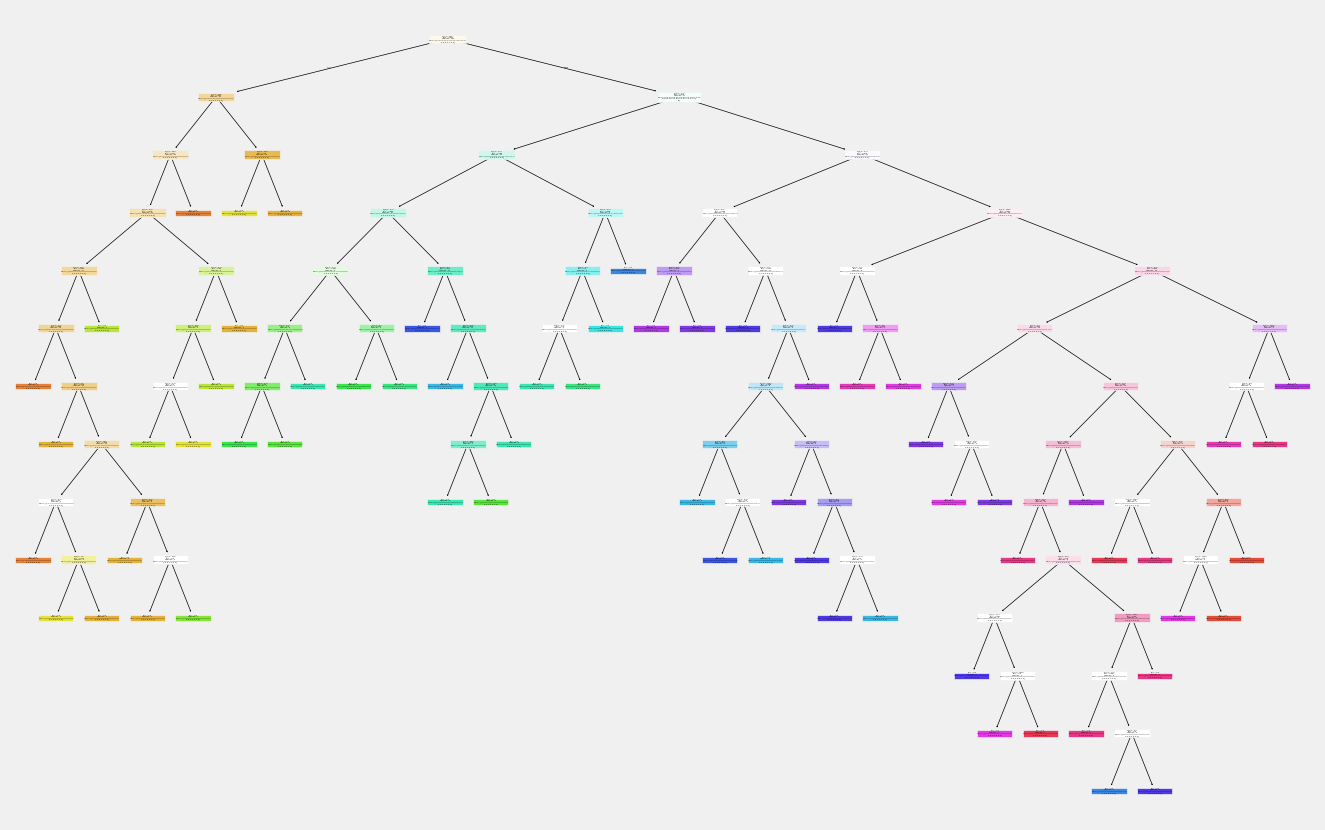

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train)  ,filled=True)
plt.show()

In [13]:
results = pd.DataFrame({
    'Model': [ 'KNN', 
              'Logistic Regression', 
              'Random Forest',
              'Naive Bayes',  
              'Decision Tree'],
    'Score': [ acc_knn,
              acc_log, 
              acc_random_forest,
              acc_gaussian,
              acc_decision_tree],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_rf,
                      accuracy_nb,
                      accuracy_dt
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

# Log each row of the DataFrame 
for i, row in result_df.iterrows(): 
    run.log(f'Model_{i}', row.to_dict())

In [14]:
run.complete()